In [1]:
import numpy as np


import matplotlib.pyplot as plt

In [2]:
X = np.array([[2,9], [3, 4], [9, 8]])


#X_2d = X.reshape(2, 1)
#X_2d
X_2= X.reshape(2, 3)


X_2.shape

(2, 3)

-0.00499463571624764

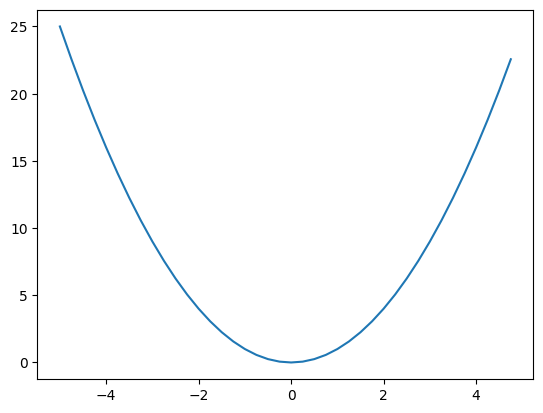

In [3]:
xs = np.arange(-5, 5, 0.25)
def parabola(x):
    return x**2
y = parabola(xs)

plt.plot(xs, y)

x = -6




for i in range(1000):
    h = 0.0001
    b = 2*x
    # change in B 
    if (abs(b) <= 0.01):
        break
    else:
        x = x - 0.01*(b)
        
    
    
x




### Matrix Multiplication Explanation for backpropagation only for one single example for interpretability

m is defined as number of datapoints

In [4]:
class NeuralNet():
    
    def __init__(self, inputs, hidden, outputs):
        self.input_nodes = inputs
        self.hidden_nodes = hidden
        self.output_nodes = outputs
        
        self.input_weights = np.random.randn(self.hidden_nodes, self.input_nodes) # 3 by 2
        self.hidden_weights = np.random.randn(self.output_nodes, self.hidden_nodes) # 1 by 3
        
    def feed_forward(self, X):
        self.X = X
        self.Z1 = np.dot(self.input_weights, X) # 3 by 2 * 2 by m
        self.A1 = self.sigmoid(self.Z1) # 3 by m
        self.Z2 = np.dot(self.hidden_weights, self.A1) # 1 by 3 * 3 by m
        self.out = self.sigmoid(self.Z2) # 1 by m
    
        return self.out
        
        
    def sigmoid(self, z):
          return 1 / (1 + np.exp(-z))
        
    def backprop(self, target):
        # derivative of the cost function with respect to the prediction
        
        
        output_error = self.out - target # (1 by m) - (1 by m) element wise subtraction
        sig_error = self.out*(1-self.out) # 1 by m times scalar = 1 by m
        self.dz2 = output_error * sig_error # 1 by m
        self.dw2 = np.dot(self.dz2,self.A1.T) # 1 by m with m by 3
        da = np.dot(self.hidden_weights.T, self.dz2) # 3 by 1 by 1 by m
        dz1 = da * self.A1*(1-self.A1) # 3 by m
        self.dw1 = np.dot(dz1, self.X.T) # 3 by m by m by 2
        
    
    def update_weights(self):
        self.hidden_weights = self.hidden_weights - (0.001*self.dw2) # element wise vector substraction
        self.input_weights = self.input_weights - (0.001*self.dw1)
        
        

In [6]:
target = np.array([0.6, 0.5, 0.2])
target_z = target.reshape(1,3)
target_z.shape
target.

(3,)

In [92]:
c = NeuralNet(2, 200, 1)

# target is parameter inside backprop
# more hidden layers = closer to target

In [93]:
for i in range(1000):
    c.feed_forward(X_2)
    #print(c.feed_forward(X_2d)) allows user to see output getting closer to target
    c.backprop(target_z)
    c.update_weights()

In [94]:
c.feed_forward(X_2)

array([[0.59172664, 0.49042041, 0.19405967]])